# Healthcare Data

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

Data source: https://data.world/bongani/healthcare

In [2]:
df = pd.read_csv('healthcare_census.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 19 columns):
 #   Column                                Non-Null Count   Dtype 
---  ------                                --------------   ----- 
 0   DRG Definition                        163065 non-null  object
 1   Provider Id                           163065 non-null  int64 
 2   Provider Name                         163065 non-null  object
 3   Provider Street Address               163065 non-null  object
 4   Provider City                         163065 non-null  object
 5   Provider State                        163065 non-null  object
 6   Provider Zip Code                     163065 non-null  int64 
 7   Hospital Referral Region Description  163065 non-null  object
 8   Total Discharges                      163065 non-null  object
 9   Average Covered Charges               163065 non-null  object
 10  Average Total Payments                163065 non-null  object
 11  Average Medic

In [4]:
df.isnull().sum()

DRG Definition                          0
Provider Id                             0
Provider Name                           0
Provider Street Address                 0
Provider City                           0
Provider State                          0
Provider Zip Code                       0
Hospital Referral Region Description    0
Total Discharges                        0
Average Covered Charges                 0
Average Total Payments                  0
Average Medicare Payments               0
Summary Level                           0
State                                   0
State FIPS                              0
Insured Males 18-25                     0
Noninsured Males 18-25                  0
Females 18-25 with Insurance            0
Females 18-25 without insurance         0
dtype: int64

In [6]:
# Convert currency and numerical columns
def clean_currency(x):
    return float(x.replace('$','').replace(',','')) if isinstance(x, str) else x

df['Total Discharges'] = pd.to_numeric(df['Total Discharges'], errors='coerce')
df['Average Covered Charges'] = df['Average Covered Charges'].apply(clean_currency)
df['Average Total Payments'] = df['Average Total Payments'].apply(clean_currency)
df['Average Medicare Payments'] = df['Average Medicare Payments'].apply(clean_currency)

# Apply the same to insurance-related columns
insurance_cols = ['Insured Males 18-25', 'Noninsured Males 18-25',
                  'Females 18-25 with Insurance', 'Females 18-25 without insurance']
for col in insurance_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [9]:
# Average Medicare payment by state
state_avg = df.groupby('Provider State')['Average Medicare Payments'].mean().sort_values(ascending=False)

In [10]:
df.corr(numeric_only=True)

,Provider Id,Provider Zip Code,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Summary Level,State FIPS,Insured Males 18-25,Noninsured Males 18-25,Females 18-25 with Insurance,Females 18-25 without insurance
Provider Id,1.000000,-0.160237,0.002130,-0.112490,-0.040059,-0.044846,NaN,0.995124,NaN,NaN,NaN,NaN
Provider Zip Code,-0.160237,1.000000,-0.074174,0.140658,0.027496,0.022262,NaN,-0.176867,NaN,NaN,NaN,NaN
Total Discharges,0.002130,-0.074174,1.000000,-0.021088,-0.017278,-0.022630,NaN,0.005366,NaN,NaN,NaN,NaN
Average Covered Charges,-0.112490,0.140658,-0.021088,1.000000,0.774112,0.768927,NaN,-0.120333,NaN,NaN,NaN,NaN
Average Total Payments,-0.040059,0.027496,-0.017278,0.774112,1.000000,0.989362,NaN,-0.040570,NaN,NaN,NaN,NaN
Average Medicare Payments,-0.044846,0.022262,-0.022630,0.768927,0.989362,1.000000,NaN,-0.045263,NaN,NaN,NaN,NaN
Summary Level,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State FIPS,0.995124,-0.176867,0.005366,-0.120333,-0.040570,-0.045263,NaN,1.000000,NaN,NaN,NaN,NaN
Insured Males 18-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Noninsured Males 18-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df['% Uninsured 18-25'] = (
    (df['Noninsured Males 18-25'] + df['Females 18-25 without insurance']) /
    (df['Insured Males 18-25'] + df['Noninsured Males 18-25'] +
     df['Females 18-25 with Insurance'] + df['Females 18-25 without insurance'])
) * 100


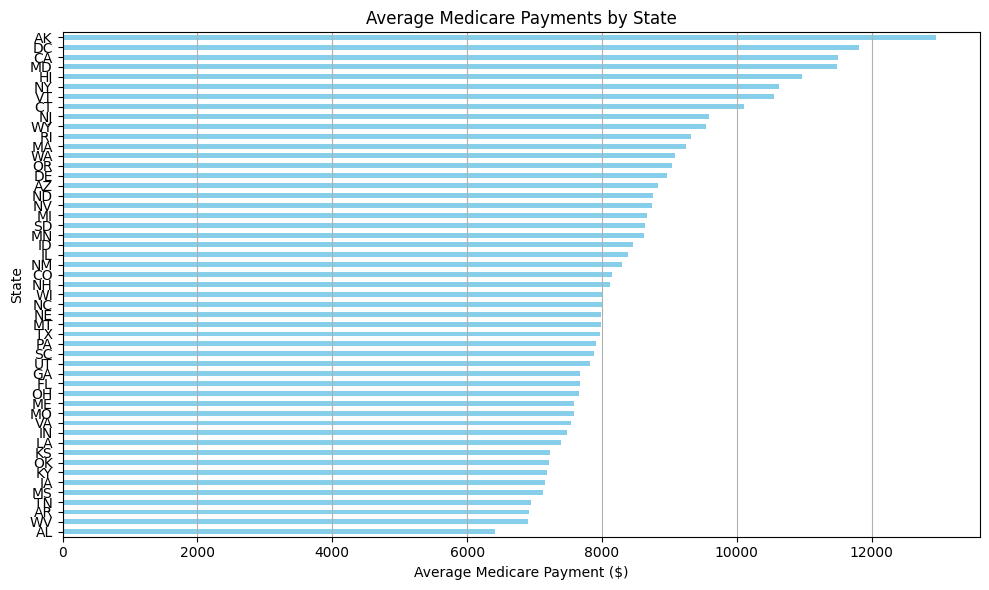

In [13]:
# Average Medicare Payments by State
state_avg_medicare = df.groupby('Provider State')['Average Medicare Payments'].mean().sort_values()

plt.figure(figsize=(10, 6))
state_avg_medicare.plot(kind='barh', color='skyblue')
plt.title('Average Medicare Payments by State')
plt.xlabel('Average Medicare Payment ($)')
plt.ylabel('State')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

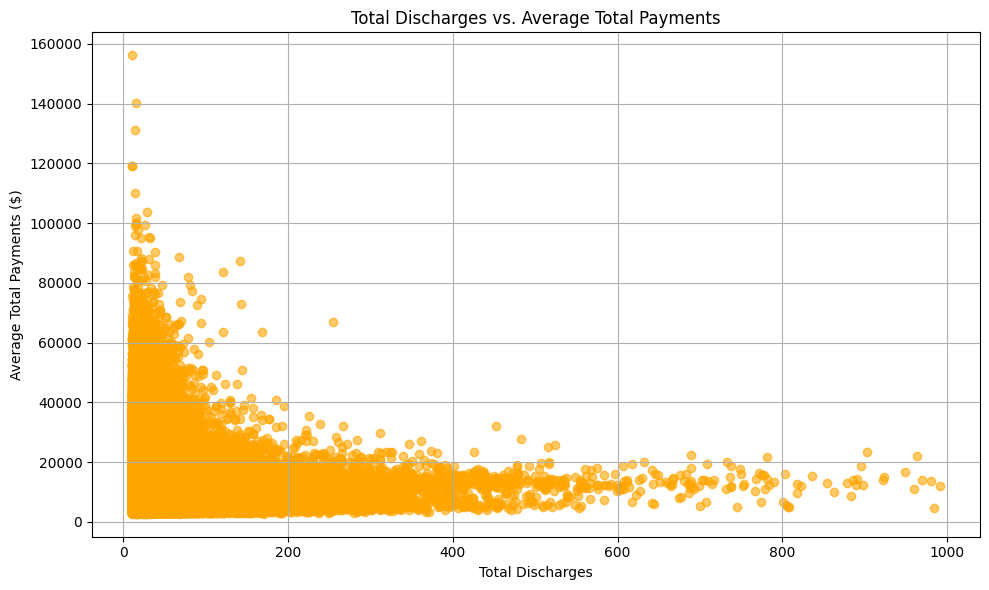

In [14]:
# Total Discharges vs. Average Total Payments
plt.figure(figsize=(10, 6))
plt.scatter(df['Total Discharges'], df['Average Total Payments'], alpha=0.6, color='orange')
plt.title('Total Discharges vs. Average Total Payments')
plt.xlabel('Total Discharges')
plt.ylabel('Average Total Payments ($)')
plt.grid(True)
plt.tight_layout()
plt.show()